**Explore whether a person with certain characteristis is expected to be away form work at some point in time or not**

In [217]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Loading dataset

In [218]:
df = pd.read_csv(r"https://raw.githubusercontent.com/MarcoCalbucci/DataAnalytics/main/PredictiveModeling/Exercises/Absenteeism_data.csv")
df

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
695,17,10,23/05/2018,179,22,40,237.656,22,2,2,0,8
696,28,6,23/05/2018,225,26,28,237.656,24,1,1,2,3
697,18,10,24/05/2018,330,16,28,237.656,25,2,0,0,8
698,25,23,24/05/2018,235,16,32,237.656,25,3,0,0,2


In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         700 non-null    int64  
 1   Reason for Absence         700 non-null    int64  
 2   Date                       700 non-null    object 
 3   Transportation Expense     700 non-null    int64  
 4   Distance to Work           700 non-null    int64  
 5   Age                        700 non-null    int64  
 6   Daily Work Load Average    700 non-null    float64
 7   Body Mass Index            700 non-null    int64  
 8   Education                  700 non-null    int64  
 9   Children                   700 non-null    int64  
 10  Pets                       700 non-null    int64  
 11  Absenteeism Time in Hours  700 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 65.8+ KB


#### Data preprocessing

##### Categorical variables

'Reason for Absence' is a categorical variable!

In [220]:
# 'Reason for Absence' is a categorical variable --> dummy variables
reason_columns = pd.get_dummies(df['Reason for Absence'])
reason_columns.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [221]:
# sum must be 1
reason_columns['check'] = reason_columns.sum(axis=1)
# reason_columns['check'].all()
# len(reason_columns['check']) == len(reason_columns[reason_columns['check']==1])
list(reason_columns['check'].unique())

[1]

In [222]:
# drop one column to avoid multicollinearity
reason_columns = pd.get_dummies(df['Reason for Absence'], drop_first=True)
reason_columns.head()

,1,2,3,4,5,6,7,8,9,10,...,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


Reasons can be divided in groups:

1-14: disease

15-17: related to pregnancy

18-21: related to poisoning

22-28: light reason (es. dental consultation)

In [223]:
# group reasons
column_disease = reason_columns.loc[:,1:14].max(axis=1)
column_pregnancy = reason_columns.loc[:,15:17].max(axis=1)
column_poisoning = reason_columns.loc[:,18:21].max(axis=1)
column_light_reason = reason_columns.loc[:,22:28].max(axis=1)

In [224]:
# add a column for each group
df["Disease"] = column_disease
df["Pregnancy"] = column_pregnancy
df["Poisoning"] = column_poisoning
df["Light reason"] = column_light_reason

In [225]:
# drop the original column
df = df.drop(columns=['Reason for Absence'])
df

,ID,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Disease,Pregnancy,Poisoning,Light reason
0,11,07/07/2015,289,36,33,239.554,30,1,2,1,4,0,0,0,1
1,36,14/07/2015,118,13,50,239.554,31,1,1,0,0,0,0,0,0
2,3,15/07/2015,179,51,38,239.554,31,1,0,0,2,0,0,0,1
3,7,16/07/2015,279,5,39,239.554,24,1,2,0,4,1,0,0,0
4,11,23/07/2015,289,36,33,239.554,30,1,2,1,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,17,23/05/2018,179,22,40,237.656,22,2,2,0,8,1,0,0,0
696,28,23/05/2018,225,26,28,237.656,24,1,1,2,3,1,0,0,0
697,18,24/05/2018,330,16,28,237.656,25,2,0,0,8,1,0,0,0
698,25,24/05/2018,235,16,32,237.656,25,3,0,0,2,0,0,0,1


'Education' is a categorical variable.

1 --> high school

2 --> graduate

3 --> postgraduate

4 --> a master or a PhD

In [226]:
# can we reduce the number of dummy variable?
df['Education'].value_counts()

1    583
3     73
2     40
4      4
Name: Education, dtype: int64

In [227]:
# yes, we can keep 
# high scool --> 0
# higher education --> 1
df['Education'] = df['Education'].map({1:0, 2:1, 3:1, 4:1})
# we must have only 0 and 1 
df['Education'].unique()

array([0, 1])

##### Dates

In [228]:
df['Date']

0      07/07/2015
1      14/07/2015
2      15/07/2015
3      16/07/2015
4      23/07/2015
          ...    
695    23/05/2018
696    23/05/2018
697    24/05/2018
698    24/05/2018
699    31/05/2018
Name: Date, Length: 700, dtype: object

In [229]:
type(df['Date'])

pandas.core.series.Series

In [230]:
type(df['Date'][0])

str

In [231]:
df['Date'].dtypes

dtype('O')

In [232]:
# convert to date specifying the format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [233]:
df['Date']

0     2015-07-07
1     2015-07-14
2     2015-07-15
3     2015-07-16
4     2015-07-23
         ...    
695   2018-05-23
696   2018-05-23
697   2018-05-24
698   2018-05-24
699   2018-05-31
Name: Date, Length: 700, dtype: datetime64[ns]

In [234]:
df['Month'] = df['Date'].dt.month
df['Month']

0      7
1      7
2      7
3      7
4      7
      ..
695    5
696    5
697    5
698    5
699    5
Name: Month, Length: 700, dtype: int64

In [235]:
def week_of_day(date):
    return date.weekday()

df['Date'].apply(lambda x: week_of_day(x))

0      1
1      1
2      2
3      3
4      3
      ..
695    2
696    2
697    3
698    3
699    3
Name: Date, Length: 700, dtype: int64

In [236]:
df['WeekDay'] = df['Date'].dt.weekday
#df['WeekDayName'] = df['Date'].dt.day_name()

Text(0, 0.5, 'absenteeism time in hours')

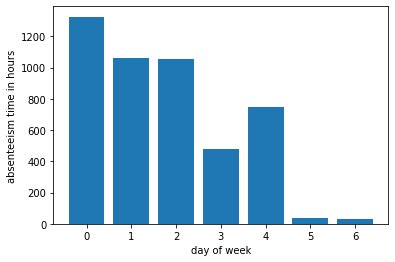

In [237]:
df_hours_by_weekday = df[['WeekDay', 'Absenteeism Time in Hours']].groupby(by=['WeekDay']).sum()
df_hours_by_weekday = df_hours_by_weekday.sort_index()
plt.bar(df_hours_by_weekday.index, df_hours_by_weekday['Absenteeism Time in Hours'])
plt.xlabel('day of week')
plt.ylabel('absenteeism time in hours')

#### Logistic regression

##### Data preparation --> inputs and targets

In [238]:
df

,ID,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Disease,Pregnancy,Poisoning,Light reason,Month,WeekDay
0,11,2015-07-07,289,36,33,239.554,30,0,2,1,4,0,0,0,1,7,1
1,36,2015-07-14,118,13,50,239.554,31,0,1,0,0,0,0,0,0,7,1
2,3,2015-07-15,179,51,38,239.554,31,0,0,0,2,0,0,0,1,7,2
3,7,2015-07-16,279,5,39,239.554,24,0,2,0,4,1,0,0,0,7,3
4,11,2015-07-23,289,36,33,239.554,30,0,2,1,2,0,0,0,1,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,17,2018-05-23,179,22,40,237.656,22,1,2,0,8,1,0,0,0,5,2
696,28,2018-05-23,225,26,28,237.656,24,0,1,2,3,1,0,0,0,5,2
697,18,2018-05-24,330,16,28,237.656,25,1,0,0,8,1,0,0,0,5,3
698,25,2018-05-24,235,16,32,237.656,25,1,0,0,2,0,0,0,1,5,3


In [239]:
# create binary target --> new column 'Excessive absenteeism' 
# 0 if 'Absenteeism Time in Hours' less than the median, 1 otherwise
df['Excessive absenteeism'] = 0
df.loc[df['Absenteeism Time in Hours'] > df['Absenteeism Time in Hours'].median(), 'Excessive absenteeism'] = 1

# drop 'Absenteeism Time in Hours'
df = df.drop(columns=['Absenteeism Time in Hours'])

In [240]:
# is the target column balanced?
df['Excessive absenteeism'].value_counts()

0    381
1    319
Name: Excessive absenteeism, dtype: int64

In [241]:
targets = df['Excessive absenteeism']

In [242]:
# define input columns

input_columns = [ 
    'Transportation Expense',
    'Distance to Work',
    'Age',
    'Daily Work Load Average',
    'Body Mass Index',
    'Education',
    'Children',
    'Pets',
    'Disease',
    'Pregnancy',
    'Poisoning',
    'Light reason',
    'Month',
    'WeekDay'
]

df_input = df[input_columns]
df_input

,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Disease,Pregnancy,Poisoning,Light reason,Month,WeekDay
0,289,36,33,239.554,30,0,2,1,0,0,0,1,7,1
1,118,13,50,239.554,31,0,1,0,0,0,0,0,7,1
2,179,51,38,239.554,31,0,0,0,0,0,0,1,7,2
3,279,5,39,239.554,24,0,2,0,1,0,0,0,7,3
4,289,36,33,239.554,30,0,2,1,0,0,0,1,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,179,22,40,237.656,22,1,2,0,1,0,0,0,5,2
696,225,26,28,237.656,24,0,1,2,1,0,0,0,5,2
697,330,16,28,237.656,25,1,0,0,1,0,0,0,5,3
698,235,16,32,237.656,25,1,0,0,0,0,0,1,5,3


Feature scaling

In [243]:
df_input.columns

Index(['Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education', 'Children',
       'Pets', 'Disease', 'Pregnancy', 'Poisoning', 'Light reason', 'Month',
       'WeekDay'],
      dtype='object')

In [244]:
# we must scale numerical columns only, not the dummy variables
columns_to_scale = ['Transportation Expense', 'Distance to Work', 'Age', 
        'Daily Work Load Average', 'Body Mass Index', 'Children', 'Pets', 'Month', 'WeekDay']

In [245]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(df_input[columns_to_scale])

X_scaled = scaler.transform(df_input[columns_to_scale]) # dataframe accepted as input but returns np.array
df_input = pd.concat([pd.DataFrame(columns=columns_to_scale, data=X_scaled), df_input[list(set(df_input.columns)-set(columns_to_scale))]], axis=1)


In [246]:
df_input

,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Children,Pets,Month,WeekDay,Education,Disease,Poisoning,Pregnancy,Light reason
0,1.005844,0.412816,-0.536062,-0.806331,0.767431,0.880469,0.268487,0.182726,-0.683704,0,0,0,0,1
1,-1.574681,-1.141882,2.130803,-0.806331,1.002633,-0.019280,-0.589690,0.182726,-0.683704,0,0,0,0,0
2,-0.654143,1.426749,0.248310,-0.806331,1.002633,-0.919030,-0.589690,0.182726,-0.007725,0,0,0,0,1
3,0.854936,-1.682647,0.405184,-0.806331,-0.643782,0.880469,-0.589690,0.182726,0.668253,0,1,0,0,0
4,1.005844,0.412816,-0.536062,-0.806331,0.767431,0.880469,0.268487,0.182726,0.668253,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,-0.654143,-0.533522,0.562059,-0.853789,-1.114186,0.880469,-0.589690,-0.388293,-0.007725,1,1,0,0,0
696,0.040034,-0.263140,-1.320435,-0.853789,-0.643782,-0.019280,1.126663,-0.388293,-0.007725,0,1,0,0,0
697,1.624567,-0.939096,-1.320435,-0.853789,-0.408580,-0.919030,-0.589690,-0.388293,0.668253,1,1,0,0,0
698,0.190942,-0.939096,-0.692937,-0.853789,-0.408580,-0.919030,-0.589690,-0.388293,0.668253,1,0,0,0,1


Split dataset into train set and test set

In [247]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_input, targets, train_size=0.8, shuffle=True, random_state=20) # set random_state to shuffle the same way every time

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(560, 14) (560,)
(140, 14) (140,)


##### Training the model

In [248]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

clf = LogisticRegression()
clf.fit(X_train, y_train)


LogisticRegression()

##### Evaluating the model

In [249]:
print(f'Accuracy: {clf.score(X_train, y_train):.3f}')

Accuracy: 0.775


In [250]:
# calculate the accuracy manually
y_pred = clf.predict(X_train)

print(f'Accuracy: {sum(y_pred==y_train)/len(y_pred):.3f}')

Accuracy: 0.775


In [251]:
# compare obtained accuracy to the baseline accuracy
baseline_outputs = np.zeros(len(y_pred))
print(f'Baseline accuracy: {sum(baseline_outputs==y_train)/len(y_pred):.3f}')

Baseline accuracy: 0.548


In [252]:
# calculate confusion matrix
metrics.confusion_matrix(y_train, y_pred)

array([[249,  58],
       [ 68, 185]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


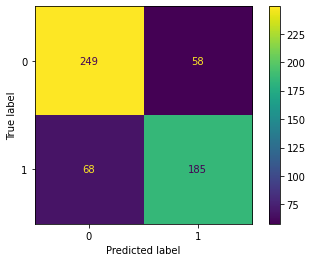

In [253]:
# plot confusion matrix
metrics.plot_confusion_matrix(clf, X_train, y_train)

##### Interpret coefficients

In [254]:
clf.intercept_

array([-1.6561092])

In [255]:
clf.coef_

array([[ 6.12732578e-01, -7.79685996e-03, -1.65922708e-01,
        -1.47005122e-04,  2.71811477e-01,  3.61989880e-01,
        -2.85510745e-01,  1.66248119e-01, -8.43703301e-02,
        -2.05738037e-01,  2.80096498e+00,  3.09561645e+00,
         9.34857518e-01,  8.56587468e-01]])

$ln \frac{p}{1-p}=m_{1}x_{1}+m_{2}x_{2}+...+m_{N}x_{N}+q$

$\frac{p}{1-p}=e^{m_{1}x_{1}}e^{m_{2}x_{2}}...e^{m_{N}x_{N}}e^{q}$

A feature is not particularly important:

- if its coefficient is around 0 (no matter the feature value, it will be 

multiplied by zero)

- if its odds ratio is around 1 (no change in the odds ratio)

In [256]:
df_summary = pd.DataFrame(columns=["Feature name"], data=df_input.columns)
df_summary['Coefficient'] = np.transpose(clf.coef_) # you have to transpose to make it a column
# inserisco l'intercetta al primo posto
df_summary.index = df_summary.index + 1
df_summary.loc[0] = ['Intercept', clf.intercept_[0]]
# calcolo odds ratio (termine per cui moltiplico odds ratio ad ogni incremento unitario della feature)
df_summary['Odds ratio'] = np.exp(df_summary['Coefficient'])
df_summary.sort_values(by=['Odds ratio'], ascending=False)

,Feature name,Coefficient,Odds ratio
12,Poisoning,3.095616,22.100858
11,Disease,2.800965,16.460523
13,Pregnancy,0.934858,2.546851
14,Light reason,0.856587,2.355110
1,Transportation Expense,0.612733,1.845467
6,Children,0.361990,1.436184
5,Body Mass Index,0.271811,1.312340
8,Month,0.166248,1.180866
4,Daily Work Load Average,-0.000147,0.999853
2,Distance to Work,-0.007797,0.992233
